<a href="https://colab.research.google.com/github/vatsbalar22/Stock-prediction-ML-DL-MLOps-Flask/blob/main/colab_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model train with Deep Learnig

# Data extract through API

In [2]:
# from alpha_vantage.timeseries import TimeSeries
# api_key = 'RDW63LUED9U3S55M'
# symbol = 'RELIANCE.BSE'

# def get_stock_data(symbol, api_key):
#     ts = TimeSeries(key=api_key, output_format='pandas')
#     data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
#     return data
# def prepare_data(data):
#     data = data[['1. open', '2. high', '3. low', '4. close', '5. volume']]
#     data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
#     return data

# data = get_stock_data(symbol,api_key)
# df = prepare_data(data)



In [3]:
# Get accurate data using yfinance library
# Give symbol and start and end date

import yfinance as yf
from datetime import datetime

symbol='RAJESHEXPO.BO'
start_date = "2001-06-06"
end_date = datetime.today().strftime('%Y-%m-%d')
df = yf.download(symbol ,start=start_date , end= end_date)


[*********************100%%**********************]  1 of 1 completed


### DATA Preprocessing if we are using yfinance library

In [4]:
df =df.reset_index()
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-06-06,2.083248,2.083248,2.083248,2.083248,0.013940,6000
1,2001-06-07,2.083248,2.083248,2.083248,2.083248,0.013940,0
2,2001-06-08,2.066580,2.066580,2.066580,2.066580,0.013828,5250
3,2001-06-11,2.066580,2.066580,2.066580,2.066580,0.013828,0
4,2001-06-12,2.066580,2.066580,2.066580,2.066580,0.013828,0
...,...,...,...,...,...,...,...
5634,2024-03-01,310.149994,315.799988,310.000000,311.750000,311.750000,59423
5635,2024-03-04,322.350006,322.950012,312.049988,313.350006,313.350006,65335
5636,2024-03-05,313.200012,328.000000,312.100006,325.799988,325.799988,140298
5637,2024-03-06,329.649994,330.750000,318.299988,329.450012,329.450012,186725


In [5]:
# Add more features to improve accuracy and drop null value

df['Tommorow']= df['Close'].shift(1)
df.dropna(inplace=True)
df['Target']=(df['Close']>df['Tommorow']).astype(int)

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Tommorow,Target
1,2001-06-07,2.083248,2.083248,2.083248,2.083248,0.013940,0,2.083248,0
2,2001-06-08,2.066580,2.066580,2.066580,2.066580,0.013828,5250,2.083248,0
3,2001-06-11,2.066580,2.066580,2.066580,2.066580,0.013828,0,2.066580,0
4,2001-06-12,2.066580,2.066580,2.066580,2.066580,0.013828,0,2.066580,0
5,2001-06-13,2.066580,2.066580,2.066580,2.066580,0.013828,0,2.066580,0
...,...,...,...,...,...,...,...,...,...
5634,2024-03-01,310.149994,315.799988,310.000000,311.750000,311.750000,59423,308.850006,1
5635,2024-03-04,322.350006,322.950012,312.049988,313.350006,313.350006,65335,311.750000,1
5636,2024-03-05,313.200012,328.000000,312.100006,325.799988,325.799988,140298,313.350006,1
5637,2024-03-06,329.649994,330.750000,318.299988,329.450012,329.450012,186725,325.799988,1


#Data visualization

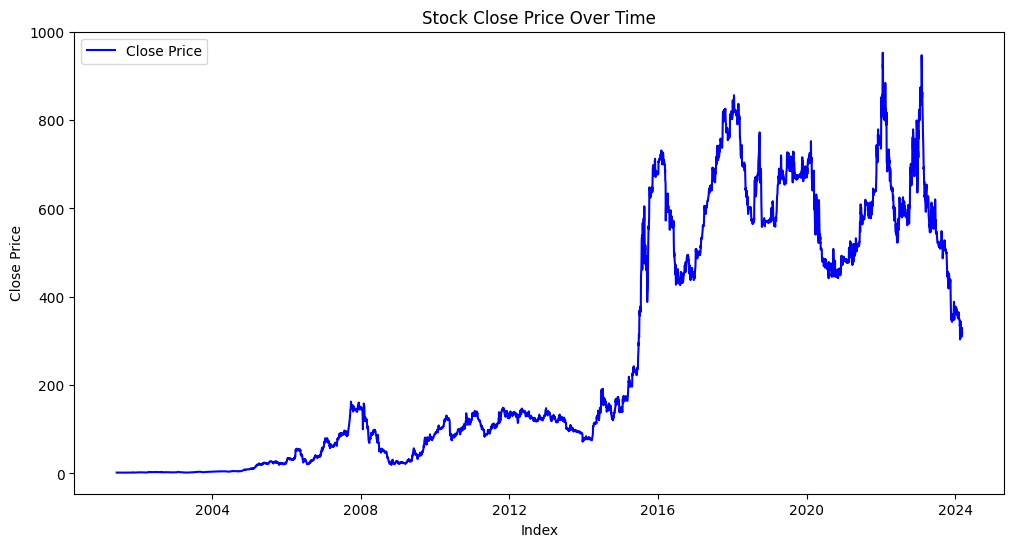

In [7]:
import matplotlib.pyplot as plt

# Plotting the closing prices using numerical index
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Stock Close Price Over Time')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# Data Analysis

In [8]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Tommorow,Target
count,5638,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000,5.638000e+03,5638.000000,5638.000000
mean,2012-09-06 23:26:32.479602688,270.452287,274.822272,265.189778,268.889196,265.624799,2.644254e+05,268.833224,0.482086
min,2001-06-07 00:00:00,1.699932,1.699932,1.699932,1.699932,0.011598,0.000000e+00,1.699932,0.000000
25%,2006-12-01 18:00:00,31.665396,32.704942,30.808024,31.552903,28.027685,3.183550e+04,31.515402,0.000000
50%,2012-08-25 12:00:00,126.339138,129.025002,123.599998,125.974998,122.276180,7.496600e+04,125.949997,0.000000
75%,2018-05-24 18:00:00,557.875015,567.037491,545.387512,553.987503,551.284637,2.626872e+05,553.987503,1.000000
max,2024-03-07 00:00:00,958.849976,1028.400024,907.299988,952.500000,948.174683,2.833409e+07,952.500000,1.000000
std,NaN,273.496499,277.359329,268.316640,271.637574,271.959845,6.407963e+05,271.660036,0.499723


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5638 entries, 1 to 5638
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5638 non-null   datetime64[ns]
 1   Open       5638 non-null   float64       
 2   High       5638 non-null   float64       
 3   Low        5638 non-null   float64       
 4   Close      5638 non-null   float64       
 5   Adj Close  5638 non-null   float64       
 6   Volume     5638 non-null   int64         
 7   Tommorow   5638 non-null   float64       
 8   Target     5638 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 440.5 KB


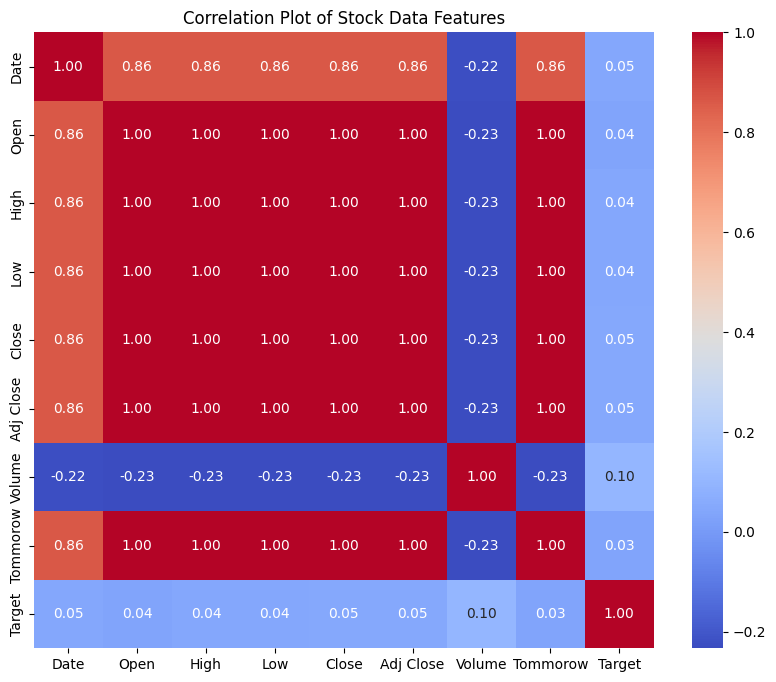

In [10]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot of Stock Data Features')
plt.show()


In [11]:
# Drop the 'Date' column from the DataFrame
df.drop(df.columns[[0,5]] , axis=1 , inplace=True)


In [12]:
df

,Open,High,Low,Close,Volume,Tommorow,Target
1,2.083248,2.083248,2.083248,2.083248,0,2.083248,0
2,2.066580,2.066580,2.066580,2.066580,5250,2.083248,0
3,2.066580,2.066580,2.066580,2.066580,0,2.066580,0
4,2.066580,2.066580,2.066580,2.066580,0,2.066580,0
5,2.066580,2.066580,2.066580,2.066580,0,2.066580,0
...,...,...,...,...,...,...,...
5634,310.149994,315.799988,310.000000,311.750000,59423,308.850006,1
5635,322.350006,322.950012,312.049988,313.350006,65335,311.750000,1
5636,313.200012,328.000000,312.100006,325.799988,140298,313.350006,1
5637,329.649994,330.750000,318.299988,329.450012,186725,325.799988,1


In [13]:

# Split the data into features (X) and target (y)
x = df.drop(columns=['Target'])  # Features are all columns except 'Market_High_Indicator'
y = df['Target']  # Target column is 'Market_High_Indicator'

# Now, you can use X and y for further processing, such as training and testing your model

#Model training

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Now, you can use X_train, X_test, y_train, and y_test for training and evaluating your model

In [15]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train_scale = scale.fit_transform(X_train)



In [16]:
X_train.shape

(4510, 6)

In [17]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_dim=6),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])



2024-03-08 05:16:22.391869: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 05:16:22.392296: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 05:16:22.897009: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-08 05:16:24.079279: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-08 05:16:31.631387: W tensorflow/compiler/tf2

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4673 (18.25 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
113/113 [==============================] - 2s 5ms/step - loss: 1752.3425 - accuracy: 0.5042 - val_loss: 1181.4744 - val_accuracy: 0.5022
Epoch 2/10
113/113 [==============================] - 0s 2ms/step - loss: 1227.0637 - accuracy: 0.5294 - val_loss: 659.6970 - val_accuracy: 0.4778
Epoch 3/10
113/113 [==============================] - 0s 3ms/step - loss: 1377.2913 - accuracy: 0.5255 - val_loss: 619.5796 - val_accuracy: 0.5022
Epoch 4/10
113/113 [==============================] - 0s 2ms/step - loss: 817.0650 - accuracy: 0.5288 - val_loss: 69.5434 - val_accuracy: 0.5776
Epoch 5/10
113/113 [==============================] - 0s 3ms/step - loss: 853.5025 - accuracy: 0.5358 - val_loss: 838.0690 - val_accuracy: 0.5333
Epoch 6/10
113/113 [==============================] - 0s 2ms/step - loss: 430.5410 - accuracy: 0.5222 - val_loss: 58.9361 - val_accuracy: 0.5798
Epoch 7/10
113/113 [==============================] - 0s 2ms/step - loss: 1171.8726 - accuracy: 0.5200 - val_loss: 615.501

#Predict next day high

In [20]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Your original array
last_row_features = df.drop(columns=['Target']).iloc[-1]
last_row_features_array = np.array(last_row_features)

# Reshape the array to a 2D array (required by MinMaxScaler)
last_row_features_array = last_row_features_array.reshape(-1, 1)

# Create the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
features_scaled_array = scaler.fit_transform(last_row_features_array)
features_scaled_array_reshaped = features_scaled_array.reshape(1, -1)

In [21]:
# Make predictions
next_day_prediction = model.predict(features_scaled_array_reshaped)

# Convert the prediction to binary (0 or 1)
next_day_prediction_binary = 1 if next_day_prediction > 0.5 else 0

print("Predicted Market High Indicator for the Next Day:", next_day_prediction_binary)


1/1 [==============================] - 0s 70ms/step
Predicted Market High Indicator for the Next Day: 0


In [22]:
import joblib



In [23]:
# from sklearn.linear_model import LogisticRegression

# # Initialize the Logistic Regression model
# model = LogisticRegression()

# # Train the model on the training data
# model.fit(X_train, y_train)

# # Once trained, you can use the model to make predictions on the test data
# y_pred = model.predict(X_test)



In [24]:
# from sklearn.metrics import accuracy_score

# # Calculate accuracy score
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


In [25]:
# # Extract features from the last row of your dataset
# last_row_features = df.drop(columns=['Market_High_Indicator']).iloc[-1]

# # Reshape the features array as scikit-learn expects a 2D array
# last_row_features = last_row_features.values.reshape(1, -1)

# # Predict the next day's market high indicator
# next_day_prediction = model.predict(last_row_features)

# print("Predicted Market High Indicator for the Next Day:", next_day_prediction[0])


In [26]:
# # Predict the next day's market high indicator
# last_row_features = df.drop(columns=['Market_High_Indicator']).iloc[-1]
# last_row_features = last_row_features.values.reshape(1, -1)
# next_day_prediction = model.predict(last_row_features)

# # Convert the prediction to binary (0 or 1)
# next_day_prediction_binary = 1 if next_day_prediction > 0.5 else 0

# print("Predicted Market High Indicator for the Next Day:", next_day_prediction_binary)
